In [13]:
%load_ext autoreload
%autoreload 2

import sys 
if '../' not in sys.path: 
    sys.path.append("../") 

import jax 
import jax.numpy as jnp 

import matplotlib.pyplot as plt 

from minimax.runners.plr_runner import PLRRunner 
from minimax.models.maze.gridworld_models import GridWorldACStudentModel
from minimax.agents.ppo import PPOAgent

from minimax.envs.maze.maze_ood import SixteenRooms
from minimax.envs.maze.maze_mutators import (
    flip_wall, 
    move_goal 
)

from enum import IntEnum, Enum

key = jax.random.PRNGKey(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
jax.random.split(key, 6)

Array([[3792494674,  582972539],
       [2883479965, 3114868201],
       [1492792183, 3245818218],
       [2909014575,   82862454],
       [1782947029,  692041252],
       [1067690106, 2610540821]], dtype=uint32)

# Define Agent 
*** 

In [65]:
model = GridWorldACStudentModel()
agent = PPOAgent(model)

runner = PLRRunner(
    env_name = 'Maze',
    env_kwargs = {
        'height': 13, 
        'width': 13, 
        'n_walls': 0, 
        'replace_wall_pos': True, 
        'sample_n_walls': False, 
        'see_agent': False, 
        'normalize_obs': True, 
        'obs_agent_pos': False, 
        'max_episode_steps': 256
    },
    student_agents = [agent],
)
runner.n_parallel = 32
print(runner.n_parallel)
runner_state = runner.reset(key)

32


In [66]:
runner.plr_mgr.

In [33]:
rng, *vrngs = jax.random.split(key, runner.n_students + 1)

In [56]:
obs, state, extra = runner.benv.reset(jnp.array(vrngs), runner.n_parallel, n_eval=2) 

(64, 2)


In [57]:
images = obs['image']

images[0][1].shape, images[0][2].shape  

((5, 5, 3), (5, 5, 3))

In [63]:
(images[0][0] ==  images[0][1]).sum(),\
(images[0][0] ==  images[0][2]).sum(),\
(images[0][0] ==  images[0][2]).sum()

(Array(75, dtype=int32), Array(65, dtype=int32))

# Jax 
***

In [42]:
state.agent_dir.shape, state.agent_pos.shape

((1, 32, 2), (1, 32, 2))

In [137]:
jax.random.split(key, 8).shape 

(8, 2)

In [134]:
brngs = jnp.repeat(
    jax.random.split(key, 8), 
    3, 
    axis=0
)

In [135]:
brngs.shape

(24, 2)

In [123]:
class MutationWeights(Enum): 

    # No Operation, Flip the Wall, Move the Goal
    NO_OP = {0:0}
    FLIP_WALL = {1:0}
    MOVE_GOAL = {2:0}

In [125]:
for i in range(len(MutationWeights)):

    print(
        list(MutationWeights)[i].name, 
        list(MutationWeights)[i].value
    )

NO_OP {0: 0}
FLIP_WALL {1: 0}
MOVE_GOAL {2: 0}


In [118]:
list(Mutations)[0].name, list(Mutations)[0].value

('NO_OP', 0)

In [96]:
maze = SixteenRooms(see_agent=True, normalize_obs=True)

In [110]:
obs_dict, env_state = maze.reset_env(key)
new_state = flip_wall(jax.random.PRNGKey(200), env_state)

<class 'jaxlib.xla_extension.ArrayImpl'> <class 'jaxlib.xla_extension.ArrayImpl'> False


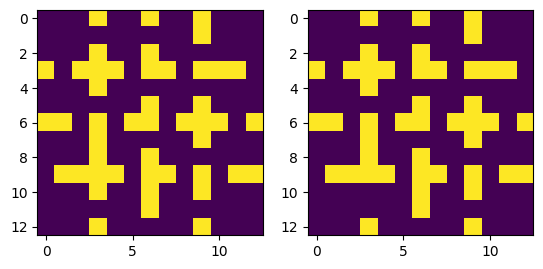

In [105]:
fig, axs = plt.subplots(ncols=2, nrows=1)
ax = axs[0]
ax.imshow(env_state.wall_map)
ax = axs[1]
ax.imshow(new_state.wall_map)

In [112]:
obs_dict, env_state = maze.reset_env(key)
new_state = move_goal(key, env_state)

print(env_state.goal_pos)
print(new_state.goal_pos)

[11 11]
[8 7]


In [63]:
x =jnp.array([1,2,3])
y =jnp.array([1,2,3])
jnp.equal(x,y)

Array([ True,  True,  True], dtype=bool)

In [37]:
list_of_lists = [
    [1, 2, 3],
    [1, 2],
    [1, 2, 3, 4]
]

jax.tree_util.tree_map(lambda x: x**2, list_of_lists)

[[1, 4, 9], [1, 4], [1, 4, 9, 16]]

In [36]:
x =  map(lambda x: x*2, list_of_lists)
list(x)

[[1, 2, 3, 1, 2, 3], [1, 2, 1, 2], [1, 2, 3, 4, 1, 2, 3, 4]]

In [38]:
list_of_lists = [
    [1, 2, 3],
    [1, 2],
    [1, 2, 3, 4]
]

jax.tree_util.tree_map(lambda x: ~x, list_of_lists)

[[-2, -3, -4], [-2, -3], [-2, -3, -4, -5]]

In [40]:
list_of_lists = [
    [False, True, False],
    [False, True],
]

jax.tree_util.tree_map(lambda x: -x, list_of_lists)

[[0, -1, 0], [0, -1]]

In [45]:
~3

-4